In [1]:
%pip install numpy pandas matplotlib seaborn scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


In [2]:
#Import & setup
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

pd.set_option('display.max_columns', None)
plt.style.use('seaborn')




OSError: 'seaborn' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

In [3]:
#Load Data
current_folder = os.getcwd()  
input_file = "gld_price_data.csv"
file_path = os.path.join(current_folder, input_file)

gold_data = pd.read_csv(file_path)

gold_data['Date'] = pd.to_datetime(gold_data['Date'])

print("First few rows of the dataset:")
gold_data.head()


First few rows of the dataset:


,Date,SPX,GLD,USO,SLV,EUR/USD
0,2008-01-02,1447.160034,84.860001,78.470001,15.180,1.471692
1,2008-01-03,1447.160034,85.570000,78.370003,15.285,1.474491
2,2008-01-04,1411.630005,85.129997,77.309998,15.167,1.475492
3,2008-01-07,1416.180054,84.769997,75.500000,15.053,1.468299
4,2008-01-08,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
#Data exploration
print("Dataset Info:")
print(gold_data.info())

print("\nMissing values:")
print(gold_data.isnull().sum())

print("\nStatistical Summary:")
gold_data.drop('Date', axis=1).describe()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     2290 non-null   datetime64[ns]
 1   SPX      2290 non-null   float64       
 2   GLD      2290 non-null   float64       
 3   USO      2290 non-null   float64       
 4   SLV      2290 non-null   float64       
 5   EUR/USD  2290 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 107.5 KB
None

Missing values:
Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

Statistical Summary:


,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


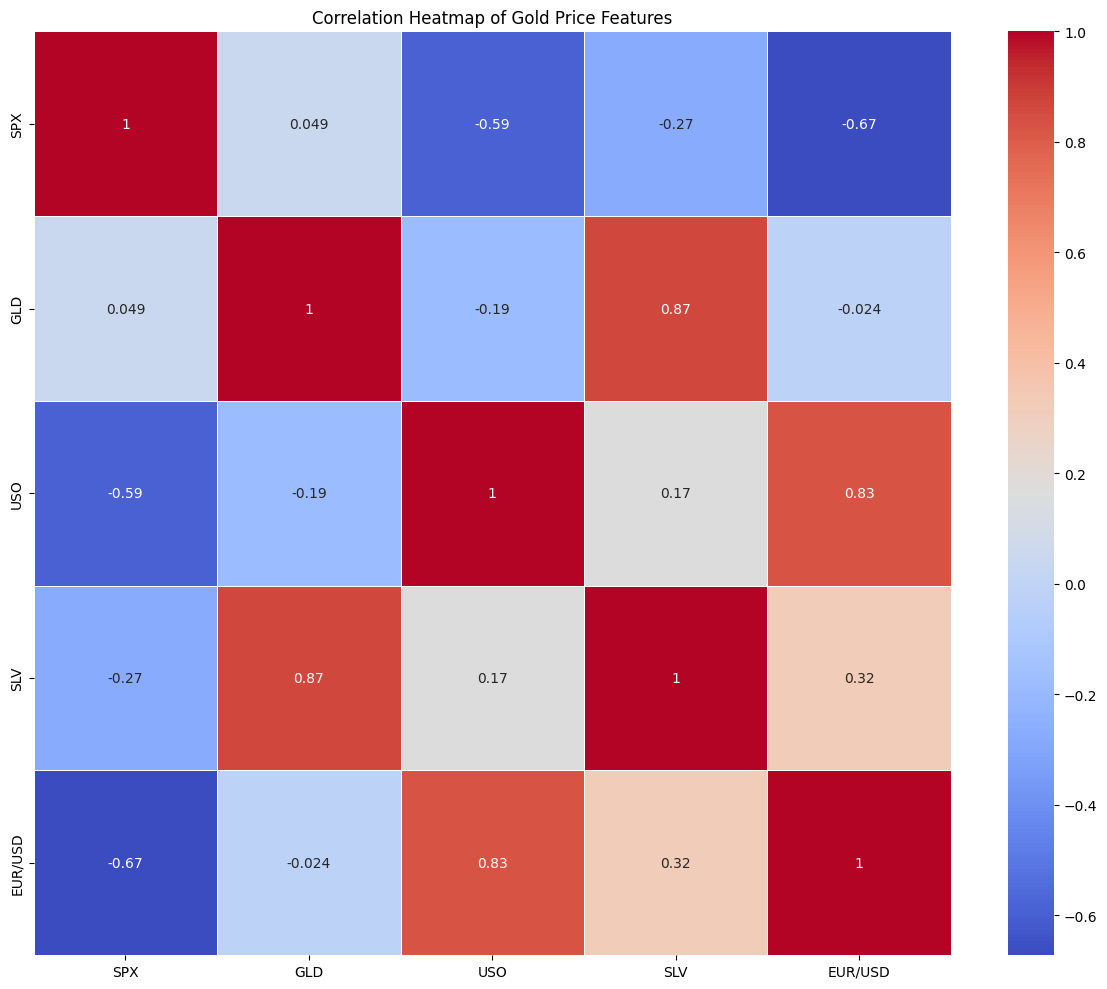

In [5]:
#Correlation Analysis
plt.figure(figsize=(12,10))
correlation = gold_data.drop('Date', axis=1).corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Gold Price Features')
plt.tight_layout()
plt.show()


In [6]:
#Data_preparation

X = gold_data.drop(['Date', 'GLD'], axis=1)
y = gold_data['GLD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [7]:
#Model Training and Evaluation
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

y_pred = rf_model.predict(X_test_scaled)

print("Model Performance Metrics:")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-squared Score:', metrics.r2_score(y_test, y_pred))


Model Performance Metrics:
Mean Absolute Error: 1.2385279378165968
Mean Squared Error: 5.475101995429074
Root Mean Squared Error: 2.3398935863472667
R-squared Score: 0.99001440263128


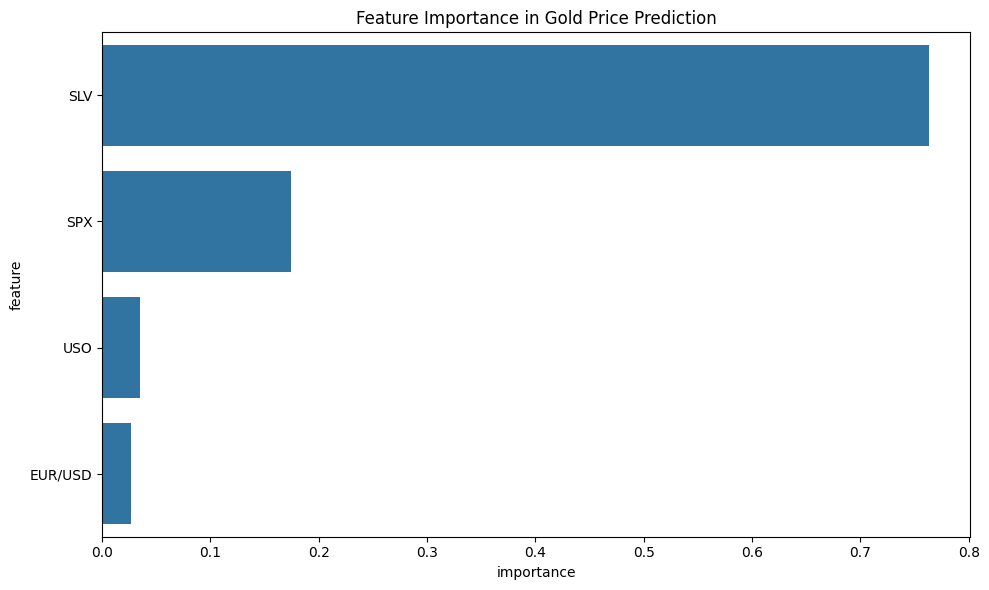

In [8]:
#Feature Importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance in Gold Price Prediction')
plt.tight_layout()
plt.show()


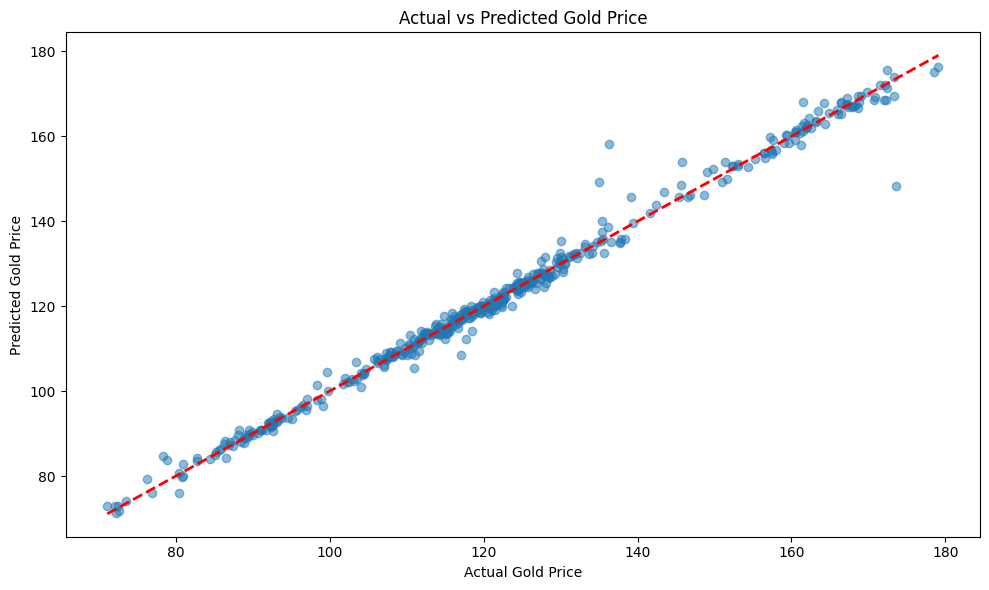

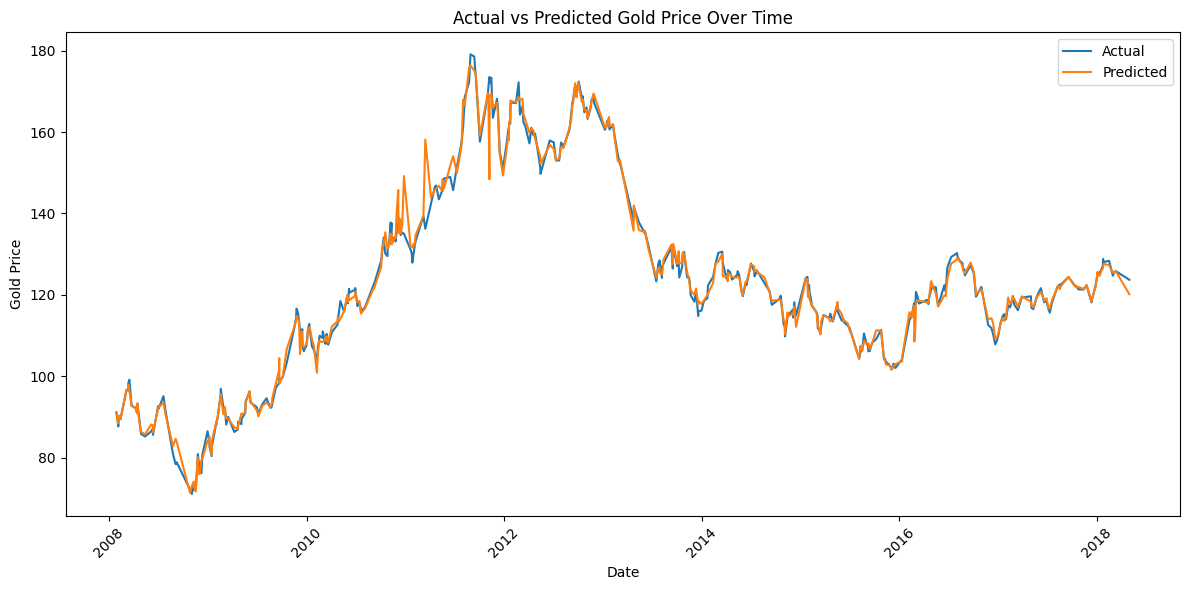

In [9]:
#Prediction Visualization
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Gold Price')
plt.ylabel('Predicted Gold Price')
plt.title('Actual vs Predicted Gold Price')
plt.tight_layout()
plt.show()

test_results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})
test_results['Date'] = gold_data.loc[y_test.index, 'Date']
test_results = test_results.sort_values('Date')

plt.figure(figsize=(12,6))
plt.plot(test_results['Date'], test_results['Actual'], label='Actual')
plt.plot(test_results['Date'], test_results['Predicted'], label='Predicted')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.title('Actual vs Predicted Gold Price Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [10]:
#Sample Predictions
print("Sample Predictions vs Actual Values:")
test_results.head(10)


Sample Predictions vs Actual Values:


,Actual,Predicted,Date
18,91.150002,90.859800,2008-01-29
23,87.680000,88.478500,2008-02-05
25,89.849998,90.358800,2008-02-07
29,89.440002,89.492000,2008-02-13
44,96.500000,96.698897,2008-03-06
48,97.010002,96.433498,2008-03-12
49,98.339996,97.930299,2008-03-13
51,99.169998,96.445999,2008-03-17
56,92.730003,92.814099,2008-03-25
65,92.290001,92.047799,2008-04-09
